<a href="https://colab.research.google.com/github/sobiyeo/Projects/blob/main/Olufemi_Sobiye_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Information above showed that the "Age" and "Cabin" columns contains NAn values

Moreso, the "Name" column has the names and titles muddled up

In [6]:
#Fixing the names column
df[["Surname", "RestNames"]] = df["Name"].str.split(',', expand=True)

In [7]:
df[["Title", "OtherNames"]] = df["RestNames"].str.split('.', n=1, expand =True)

In [8]:
#dropping "Name", "RestofNames" and "Othernames" columns
df = df.drop(columns=["Name", "RestNames"]);

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
Title            0
OtherNames       0
dtype: int64

In [10]:
#Drop the "Cabin" column
df= df.drop(columns="Cabin");

In [11]:
#impute the NAN values for Age with mean of ages
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Surname      891 non-null    object 
 11  Title        891 non-null    object 
 12  OtherNames   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [20]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
Surname        667
Title           17
OtherNames     799
dtype: int64

# Exploratory Data Analysis

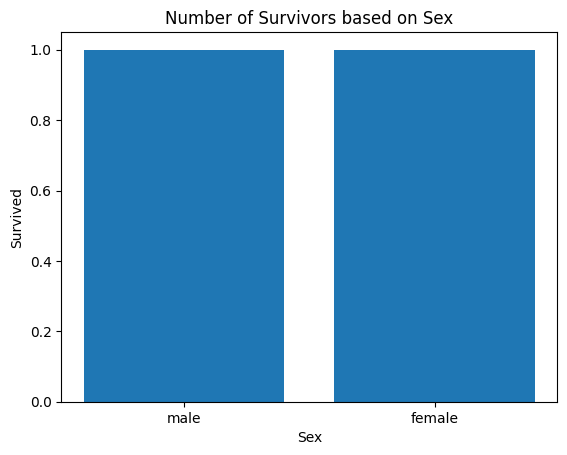

In [25]:
#Number of Survivors based on Sex
plt.bar(df.Sex, df.Survived)
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Number of Survivors based on Sex");

<ipython-input-42-730026f57f65>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


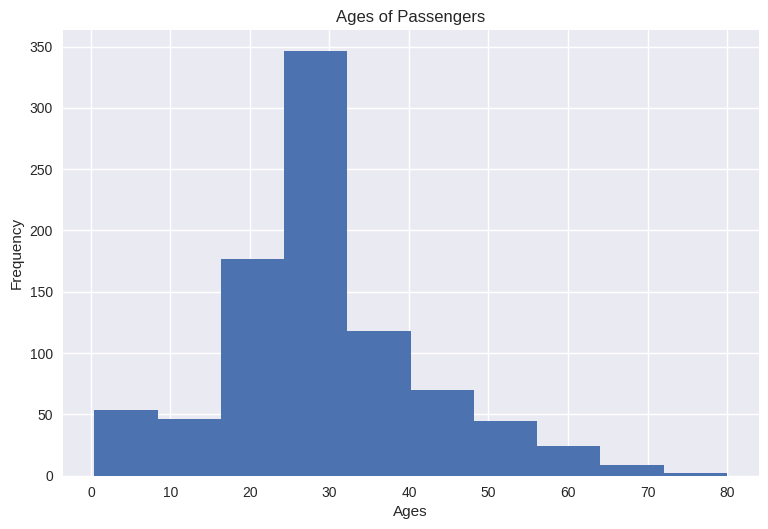

In [42]:
#Distribution of Ages of Passengers
plt.style.use('seaborn')
plt.hist(df.Age)
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.title("Ages of Passengers");


In [33]:
#Age of Male Survivors
male_surv = df[(df['Sex']=='male') & (df['Survived']== 1)]

In [35]:
male_surv['Age'].head()

17    29.699118
21    34.000000
23    28.000000
36    29.699118
55    29.699118
Name: Age, dtype: float64

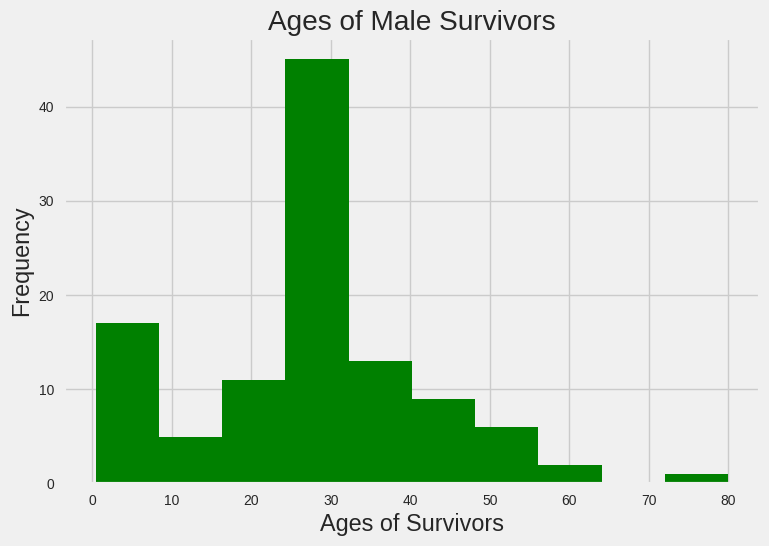

In [43]:
plt.style.use('fivethirtyeight')
plt.hist(male_surv['Age'], color='green')
plt.xlabel("Ages of Survivors")
plt.ylabel("Frequency")
plt.title("Ages of Male Survivors");

# Thank you
## Prepared by Olufemi Sobiye.